### Importing Liabraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans

# Importing the Data

In [2]:
hepC = pd.read_csv("HepC/hcvdat0.csv")
stroke = pd.read_excel("StrokeDataset/Full dataset.xlsx")
heart = pd.read_csv("HeartAttackDataset/Medicaldataset.csv")
cirhosis = pd.read_csv('CirhosisDataset/indian_liver_patient.csv')

In [3]:
hepC.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
stroke.head()

,author,year,strokeandnoaf,nostrokewithnoaf,strokenonoaf,nostrokenonoaf,metric,pe,l95ci,u95ci,typeofsurgery,studytype,quality
0,Ahlsson,2010,15.0,150.0,12.0,394.0,RR,3.075760,1.471570,6.42870,CABG only,Prospective cohort and randomised trials,Poor
1,Elahi,2003,1.0,135.0,8.0,733.0,RR,0.681066,0.085869,5.40185,CABG only,Retrospective cohort,Good
2,Gialdini,2014,117.0,11720.0,512.0,61194.0,OR,1.193160,0.975114,1.45995,Mixed,Retrospective cohort,Good
3,Horwich,2013,268.0,1946.0,493.0,5351.0,OR,1.494790,1.278130,1.74817,CABG only,Retrospective cohort,Good
4,Konstantino,2016,6.0,31.0,6.0,93.0,RR,2.675680,0.920790,7.77510,CABG only,Prospective cohort and randomised trials,Poor


In [5]:
heart.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
cirhosis.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Exploratory Data Analysis (EDA)

In [7]:
hepC.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [8]:
stroke.columns

Index(['author', 'year', 'strokeandnoaf', 'nostrokewithnoaf', 'strokenonoaf',
       'nostrokenonoaf', 'metric', 'pe', 'l95ci', 'u95ci', 'typeofsurgery',
       'studytype', 'quality'],
      dtype='object')

In [9]:
heart.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [10]:
cirhosis.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [11]:
hepC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [12]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            13 non-null     object 
 1   year              13 non-null     int64  
 2   strokeandnoaf     12 non-null     float64
 3   nostrokewithnoaf  12 non-null     float64
 4   strokenonoaf      12 non-null     float64
 5   nostrokenonoaf    12 non-null     float64
 6   metric            13 non-null     object 
 7   pe                13 non-null     float64
 8   l95ci             13 non-null     float64
 9   u95ci             13 non-null     float64
 10  typeofsurgery     13 non-null     object 
 11  studytype         13 non-null     object 
 12  quality           13 non-null     object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.4+ KB


In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [14]:
cirhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [15]:
hepC.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [16]:
stroke.describe()

,year,strokeandnoaf,nostrokewithnoaf,strokenonoaf,nostrokenonoaf,pe,l95ci,u95ci
count,13.000000,12.000000,12.000000,12.000000,12.000000,13.000000,13.000000,13.000000
mean,2009.461538,35.833333,1325.250000,88.833333,6042.416667,2.489214,0.598635,51.388731
std,8.211936,80.102018,3335.106026,193.365802,17449.437430,2.263781,0.511558,74.831113
min,1987.000000,0.000000,31.000000,0.000000,74.000000,0.681066,0.048088,1.200000
25%,2010.000000,0.750000,48.250000,0.000000,153.000000,1.100000,0.085869,2.226230
50%,2013.000000,4.000000,114.000000,7.000000,304.000000,2.000000,0.461153,6.428700
75%,2014.000000,12.750000,494.250000,14.000000,1456.000000,3.052630,0.975114,117.632000
max,2016.000000,268.000000,11720.000000,512.000000,61194.000000,9.375000,1.471570,190.589000


In [17]:
heart.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [18]:
cirhosis.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [19]:
hepC.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [20]:
stroke.isnull().sum()

author              0
year                0
strokeandnoaf       1
nostrokewithnoaf    1
strokenonoaf        1
nostrokenonoaf      1
metric              0
pe                  0
l95ci               0
u95ci               0
typeofsurgery       0
studytype           0
quality             0
dtype: int64

In [21]:
heart.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [22]:
cirhosis.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [23]:
hepC.dropna(inplace=True)
stroke.dropna(inplace=True)
cirhosis.dropna(inplace=True)

In [24]:
hepC

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [25]:
heart

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [26]:
stroke

,author,year,strokeandnoaf,nostrokewithnoaf,strokenonoaf,nostrokenonoaf,metric,pe,l95ci,u95ci,typeofsurgery,studytype,quality
0,Ahlsson,2010,15.0,150.0,12.0,394.0,RR,3.075760,1.471570,6.42870,CABG only,Prospective cohort and randomised trials,Poor
1,Elahi,2003,1.0,135.0,8.0,733.0,RR,0.681066,0.085869,5.40185,CABG only,Retrospective cohort,Good
2,Gialdini,2014,117.0,11720.0,512.0,61194.0,OR,1.193160,0.975114,1.45995,Mixed,Retrospective cohort,Good
3,Horwich,2013,268.0,1946.0,493.0,5351.0,OR,1.494790,1.278130,1.74817,CABG only,Retrospective cohort,Good
4,Konstantino,2016,6.0,31.0,6.0,93.0,RR,2.675680,0.920790,7.77510,CABG only,Prospective cohort and randomised trials,Poor
5,Loubani,2000,1.0,93.0,3.0,278.0,OR,0.996416,0.102405,9.69528,CABG only,Retrospective cohort,Poor
6,Park*,2014,2.0,37.0,0.0,74.0,RR,9.375000,0.461153,190.58900,CABG only,Prospective cohort and randomised trials,Poor
7,Philip,2014,8.0,1482.0,20.0,3625.0,OR,0.978408,0.430001,2.22623,CABG only,Retrospective cohort,Good
8,Pohjantahti-Maaroos,2013,12.0,165.0,12.0,330.0,OR,2.000000,0.880432,4.54322,Mixed,Retrospective cohort,Poor
9,Rostagno,2014,0.0,56.0,0.0,173.0,RR,3.052630,0.061264,152.10600,CABG only,Prospective cohort and randomised trials,Poor


In [27]:
cirhosis

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Number of patients that are male:  363
Number of patients that are female:  226


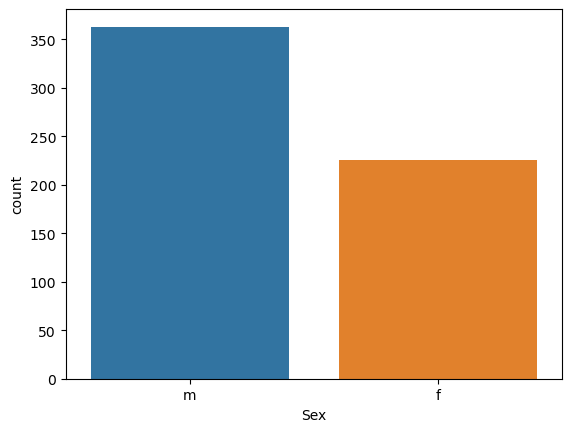

In [28]:
# Plotting the Number of Male and Female patients
sns.countplot(data=hepC, x = 'Sex', label='Count')

M, F = hepC['Sex'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

Number of patients that are male:  870
Number of patients that are female:  449


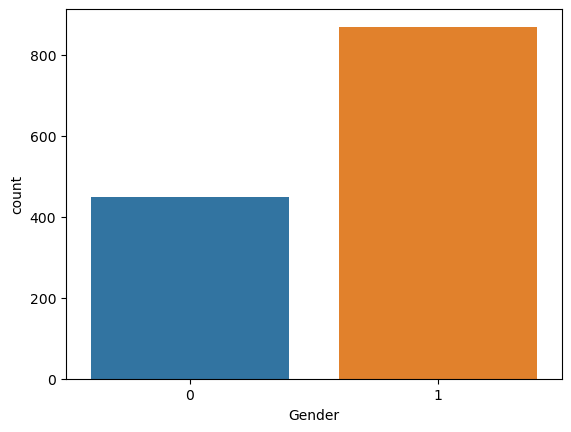

In [29]:
# Plotting the Number of Male and Female patients
sns.countplot(data=heart, x = 'Gender', label='Count')

M, F = heart['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

Number of patients those could be Blood Donor:  526
Number of patients could be suspected Blood Donor:  24
Number of patients diagnosed with Hepatitis disease:  20
Number of patients diagnosed with Fibrosis disease:  12
Number of patients diagnosed with Cirrhosis disease:  7


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0=Blood Donor'),
  Text(1, 0, '0s=suspect Blood Donor'),
  Text(2, 0, '1=Hepatitis'),
  Text(3, 0, '2=Fibrosis'),
  Text(4, 0, '3=Cirrhosis')])

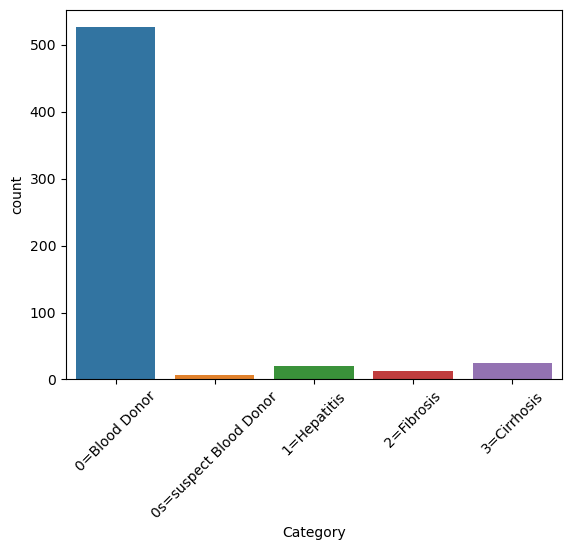

In [30]:
sns.countplot(data=hepC, x = 'Category', label='Count')
S1, S2, S3, S4, S5 = hepC['Category'].value_counts()
print('Number of patients those could be Blood Donor: ',S1)
print('Number of patients could be suspected Blood Donor: ',S2)
print('Number of patients diagnosed with Hepatitis disease: ',S3)
print('Number of patients diagnosed with Fibrosis disease: ',S4)
print('Number of patients diagnosed with Cirrhosis disease: ',S5)
plt.xticks(rotation=45)

Number of patients with poor heart condition:  8
Number of patients with Good heart condition:  4


(array([0, 1]), [Text(0, 0, 'Poor'), Text(1, 0, 'Good')])

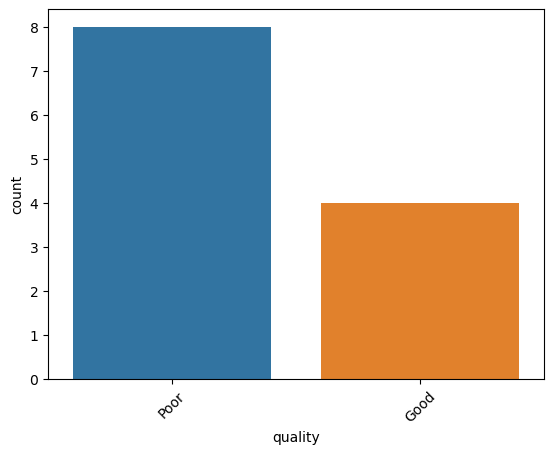

In [31]:
sns.countplot(data=stroke, x = 'quality', label='Count')
S1, S2 = stroke['quality'].value_counts()
print('Number of patients with poor heart condition: ',S1)
print('Number of patients with Good heart condition: ',S2)
plt.xticks(rotation=45)

Number of patients with Negative report:  810
Number of patients with positive report:  509


(array([0, 1]), [Text(0, 0, 'negative'), Text(1, 0, 'positive')])

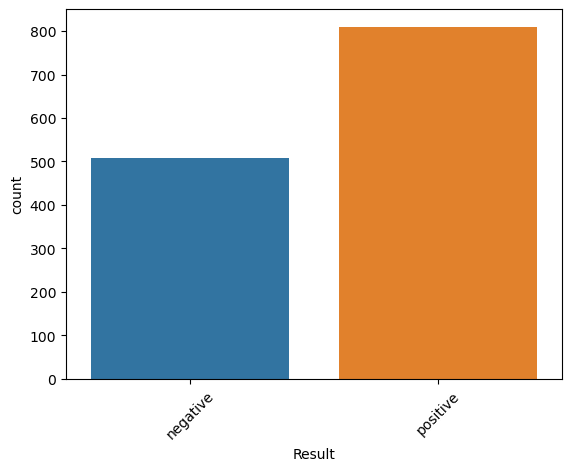

In [32]:
sns.countplot(data=heart, x = 'Result', label='Count')
S1, S2= heart['Result'].value_counts()
print('Number of patients with Negative report: ',S1)
print('Number of patients with positive report: ',S2)
plt.xticks(rotation=45)

Number of patients that are male:  439
Number of patients that are female:  140


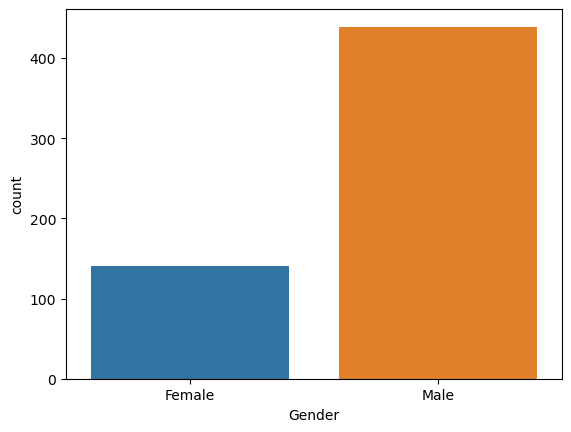

In [33]:
# Plotting the Number of Male and Female patients
sns.countplot(data=cirhosis, x = 'Gender', label='Count')

M, F = cirhosis['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

#  Label Encoder

In [34]:
le = LabelEncoder()
le

LabelEncoder()

In [35]:
hepC= hepC.apply(le.fit_transform)

In [36]:
hepC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  589 non-null    int64
 1   Category    589 non-null    int32
 2   Age         589 non-null    int64
 3   Sex         589 non-null    int32
 4   ALB         589 non-null    int64
 5   ALP         589 non-null    int64
 6   ALT         589 non-null    int64
 7   AST         589 non-null    int64
 8   BIL         589 non-null    int64
 9   CHE         589 non-null    int64
 10  CHOL        589 non-null    int64
 11  CREA        589 non-null    int64
 12  GGT         589 non-null    int64
 13  PROT        589 non-null    int64
dtypes: int32(2), int64(12)
memory usage: 64.4 KB


In [37]:
le1 = LabelEncoder()
stroke= stroke.apply(le1.fit_transform)

In [38]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   author            12 non-null     int32
 1   year              12 non-null     int64
 2   strokeandnoaf     12 non-null     int64
 3   nostrokewithnoaf  12 non-null     int64
 4   strokenonoaf      12 non-null     int64
 5   nostrokenonoaf    12 non-null     int64
 6   metric            12 non-null     int32
 7   pe                12 non-null     int64
 8   l95ci             12 non-null     int64
 9   u95ci             12 non-null     int64
 10  typeofsurgery     12 non-null     int32
 11  studytype         12 non-null     int32
 12  quality           12 non-null     int32
dtypes: int32(5), int64(8)
memory usage: 1.1 KB


In [39]:
le2 = LabelEncoder()
heart= heart.apply(le2.fit_transform)

In [40]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1319 non-null   int64
 1   Gender                    1319 non-null   int64
 2   Heart rate                1319 non-null   int64
 3   Systolic blood pressure   1319 non-null   int64
 4   Diastolic blood pressure  1319 non-null   int64
 5   Blood sugar               1319 non-null   int64
 6   CK-MB                     1319 non-null   int64
 7   Troponin                  1319 non-null   int64
 8   Result                    1319 non-null   int32
dtypes: int32(1), int64(8)
memory usage: 87.7 KB


In [41]:
le3 = LabelEncoder()
cirhosis= cirhosis.apply(le3.fit_transform)

In [42]:
cirhosis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         579 non-null    int64
 1   Gender                      579 non-null    int32
 2   Total_Bilirubin             579 non-null    int64
 3   Direct_Bilirubin            579 non-null    int64
 4   Alkaline_Phosphotase        579 non-null    int64
 5   Alamine_Aminotransferase    579 non-null    int64
 6   Aspartate_Aminotransferase  579 non-null    int64
 7   Total_Protiens              579 non-null    int64
 8   Albumin                     579 non-null    int64
 9   Albumin_and_Globulin_Ratio  579 non-null    int64
 10  Dataset                     579 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 52.0 KB


# Train Test Split

In [43]:
X_hepC = hepC.drop('Category', axis =1)
y_hepC = hepC['Category']
X_hepC.shape, y_hepC.shape

((589, 13), (589,))

In [44]:
X_stroke = stroke.drop('quality', axis =1)
y_stroke = stroke['quality']
X_stroke.shape, y_stroke.shape

((12, 12), (12,))

In [45]:
X_heart = heart.drop('Result', axis =1)
y_heart = heart['Result']
X_heart, y_heart

(      Age  Gender  Heart rate  Systolic blood pressure  \
 0      46       1          22                       85   
 1       3       1          50                       23   
 2      37       1          20                       85   
 3      46       1          26                       45   
 4      37       1          20                       37   
 ...   ...     ...         ...                      ...   
 1314   26       1          50                       47   
 1315   48       1          40                       50   
 1316   27       1          41                       92   
 1317   36       1          14                       42   
 1318   33       1          50                       82   
 
       Diastolic blood pressure  Blood sugar  CK-MB  Troponin  
 0                           44           96    147        11  
 1                            7          199    454       251  
 2                           38          186    164         2  
 3                           16   

In [46]:
X_cirhosis = cirhosis.drop('Dataset', axis =1)
y_cirhosis = cirhosis['Dataset']
X_cirhosis, y_cirhosis

(     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
 0     58       0                3                 0                    71   
 1     55       1               69                45                   235   
 2     55       1               56                36                   201   
 3     52       1                6                 3                    66   
 4     64       1               35                19                    79   
 ..   ...     ...              ...               ...                   ...   
 578   53       1                1                 0                   203   
 579   34       1                2                 0                     5   
 580   46       1                4                 1                   117   
 581   25       1                9                 4                    68   
 582   32       1                6                 2                    97   
 
      Alamine_Aminotransferase  Aspartate_Aminotransferase  To

In [47]:
X_train_hepC, X_test_hepC, y_train_hepC, y_test_hepC = train_test_split(X_hepC, y_hepC, test_size=0.15, random_state=1)
X_train_hepC, X_val_hepC, y_train_hepC, y_val_hepC = train_test_split(X_train_hepC, y_train_hepC, test_size=0.05, random_state=1)
X_train_hepC.shape, y_train_hepC.shape, X_test_hepC.shape, y_test_hepC.shape, X_val_hepC.shape, y_val_hepC.shape

((475, 13), (475,), (89, 13), (89,), (25, 13), (25,))

In [48]:
X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = train_test_split(X_stroke, y_stroke, test_size=0.15, random_state=1)
X_train_stroke, X_val_stroke, y_train_stroke, y_val_stroke = train_test_split(X_train_stroke, y_train_stroke, test_size=0.05, random_state=1)
X_train_stroke.shape, y_train_stroke.shape, X_test_stroke.shape, y_test_stroke.shape, X_val_stroke.shape, y_val_stroke.shape

((9, 12), (9,), (2, 12), (2,), (1, 12), (1,))

In [49]:
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.15, random_state=1)
X_train_heart, X_val_heart, y_train_heart, y_val_heart = train_test_split(X_train_heart, y_train_heart, test_size=0.05, random_state=1)
X_train_heart.shape, y_train_heart.shape, X_test_heart.shape, y_test_heart.shape, X_val_heart.shape, y_val_heart.shape 

((1064, 8), (1064,), (198, 8), (198,), (57, 8), (57,))

In [50]:
X_train_cirhosis, X_test_cirhosis, y_train_cirhosis, y_test_cirhosis = train_test_split(X_cirhosis, y_cirhosis, test_size=0.15, random_state=1)
X_train_cirhosis, X_val_cirhosis, y_train_cirhosis, y_val_cirhosis = train_test_split(X_train_cirhosis, y_train_cirhosis, test_size=0.05, random_state=1)
X_train_cirhosis.shape, y_train_cirhosis.shape, X_test_cirhosis.shape, y_test_cirhosis.shape, X_val_cirhosis.shape, y_val_cirhosis.shape

((467, 10), (467,), (87, 10), (87,), (25, 10), (25,))

In [51]:
result_hepC = pd.DataFrame()
result_stroke = pd.DataFrame()
result_heart = pd.DataFrame()
result_cirhosis = pd.DataFrame()
result = pd.DataFrame()

# Hepatitis Data Modelling

# DBScan

In [52]:
model = DBSCAN(algorithm='auto',eps=10, metric='cosine', min_samples=10)
model.fit(X_train_hepC, y_train_hepC)

DBSCAN(eps=10, metric='cosine', min_samples=10)

In [53]:
#Applying our function 
y_pred = model.fit_predict(X_test_hepC, y_test_hepC)

In [54]:
#Checking the accuracy
DBScanACC = accuracy_score(y_test_hepC, y_pred)*100
DBScanACC

84.26966292134831

In [55]:
#Checking the accuracy
DBScanf1 = f1_score(y_test_hepC, y_pred, average='weighted')*100
DBScanf1

77.07591120855028

In [56]:
#Checking the precision score
DBScanPrec = precision_score(y_test_hepC, y_pred, average='weighted')*100
DBScanPrec

71.01376088877667

In [57]:
#Checking the recall score
DBScanRecal = recall_score(y_test_hepC, y_pred, average='weighted')*100
DBScanRecal

84.26966292134831

In [58]:
result_hepC = result_hepC.append([['DBSCan', DBScanACC, DBScanf1, DBScanPrec, DBScanRecal]])
result = result.append([['DBSCan Hepatitis C', DBScanACC, DBScanf1, DBScanPrec, DBScanRecal]])

# K-means

In [59]:
model = KMeans(algorithm= 'lloyd', n_clusters= 2)
model.fit(X_train_hepC, y_train_hepC)

KMeans(n_clusters=2)

In [60]:
ypred = model.predict(X_test_hepC)

In [61]:
#Checking the accuracy
KAcc = accuracy_score(y_test_hepC, ypred)*100
KAcc

55.0561797752809

In [62]:
#Checking the f1 score
Kf1 = f1_score(y_test_hepC, ypred, average='weighted')*100
Kf1

65.82494877918282

In [63]:
#Checking the precision score
Kprec = precision_score(y_test_hepC, ypred, average='weighted')*100
Kprec

84.29706768977803

In [64]:
# Checking the recall score
Krecal = recall_score(y_test_hepC, ypred, average='weighted')*100
Krecal

55.0561797752809

In [65]:
result_hepC = result_hepC.append([['KMeans', KAcc, Kf1, Kprec, Krecal]])
result = result.append([['KMeans Hepatitis C', KAcc, Kf1, Kprec, Krecal]])

# K-Nearest Neigbour

In [66]:
model = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
model.fit(X_train_hepC, y_train_hepC)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)

In [67]:
ypred = model.predict(X_test_hepC)

In [68]:
#Checking the accuracy
knnAcc = accuracy_score(y_test_hepC, ypred)*100
knnAcc

93.25842696629213

In [69]:
#Checking the f1 score
knnf1 = f1_score(y_test_hepC, ypred, average='weighted')*100
knnf1

93.19972550867706

In [70]:
#Checking the precision score
knnprec = precision_score(y_test_hepC, ypred, average='weighted')*100
knnprec

93.27321111768184

In [71]:
# Checking the recall score
knnrecal = recall_score(y_test_hepC, ypred, average='weighted')*100
knnrecal

93.25842696629213

In [72]:
result_hepC = result_hepC.append([['NN', knnAcc, knnf1, knnprec, knnrecal]])
result = result.append([['NN Hepatitis C', knnAcc, knnf1, knnprec, knnrecal]])

In [73]:
result_hepC

,0,1,2,3,4
0,DBSCan,84.269663,77.075911,71.013761,84.269663
0,KMeans,55.056180,65.824949,84.297068,55.056180
0,NN,93.258427,93.199726,93.273211,93.258427


In [74]:
result

,0,1,2,3,4
0,DBSCan Hepatitis C,84.269663,77.075911,71.013761,84.269663
0,KMeans Hepatitis C,55.056180,65.824949,84.297068,55.056180
0,NN Hepatitis C,93.258427,93.199726,93.273211,93.258427


# Stoke Data Modelling

# DBScan

In [75]:
model = DBSCAN(algorithm='kd_tree',metric='euclidean', min_samples=2)
model.fit(X_train_stroke, y_train_stroke)

DBSCAN(algorithm='kd_tree', min_samples=2)

In [76]:
#Applying our function 
y_pred = model.fit_predict(X_test_stroke, y_test_stroke)

In [77]:
#Checking the accuracy
DBScanACC = accuracy_score(y_test_stroke, y_pred)*100
DBScanACC

0.0

In [78]:
#Checking the accuracy
DBScanf1 = f1_score(y_test_stroke, y_pred, average='weighted')*100
DBScanf1

0.0

In [79]:
#Checking the precision score
DBScanPrec = precision_score(y_test_stroke, y_pred, average='weighted')*100
DBScanPrec

0.0

In [80]:
#Checking the recall score
DBScanRecal = recall_score(y_test_stroke, y_pred, average='weighted')*100
DBScanRecal

0.0

In [81]:
result_stroke = result_stroke.append([['DBSCan', DBScanACC, DBScanf1, DBScanPrec, DBScanRecal]])
result = result.append([['DBSCan Stroke', DBScanACC, DBScanf1, DBScanPrec, DBScanRecal]])

# K-means

In [82]:
model = KMeans(algorithm= 'lloyd', n_clusters= 2)
model.fit(X_train_stroke, y_train_stroke)

KMeans(n_clusters=2)

In [83]:
ypred = model.predict(X_test_stroke)

In [84]:
#Checking the accuracy
KAcc = accuracy_score(y_test_stroke, ypred)*100
KAcc

0.0

In [85]:
#Checking the f1 score
Kf1 = f1_score(y_test_stroke, ypred, average='weighted')*100
Kf1

0.0

In [86]:
#Checking the precision score
Kprec = precision_score(y_test_stroke, ypred, average='weighted')*100
Kprec

0.0

In [87]:
# Checking the recall score
Krecal = recall_score(y_test_stroke, ypred, average='weighted')*100
Krecal

0.0

In [88]:
result_stroke = result_stroke.append([['KMeans', KAcc, Kf1, Kprec, Krecal]])
result = result.append([['KMeans Stroke', KAcc, Kf1, Kprec, Krecal]])

# K-Nearest Neigbour

In [89]:
model = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
model.fit(X_train_stroke, y_train_stroke)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)

In [90]:
ypred = model.predict(X_test_stroke)

In [91]:
#Checking the accuracy
knnAcc = accuracy_score(y_test_stroke, ypred)*100
knnAcc

100.0

In [92]:
#Checking the f1 score
knnf1 = f1_score(y_test_stroke, ypred, average='weighted')*100
knnf1

100.0

In [93]:
#Checking the precision score
knnprec = precision_score(y_test_stroke, ypred, average='weighted')*100
knnprec

100.0

In [94]:
# Checking the recall score
knnrecal = recall_score(y_test_stroke, ypred, average='weighted')*100
knnrecal

100.0

In [95]:
result_stroke = result_stroke.append([['KNN', knnAcc, knnf1, knnprec, knnrecal]])
result = result.append([['KNN Stroke', knnAcc, knnf1, knnprec, knnrecal]])

In [96]:
result_stroke

,0,1,2,3,4
0,DBSCan,0.0,0.0,0.0,0.0
0,KMeans,0.0,0.0,0.0,0.0
0,KNN,100.0,100.0,100.0,100.0


In [97]:
result

,0,1,2,3,4
0,DBSCan Hepatitis C,84.269663,77.075911,71.013761,84.269663
0,KMeans Hepatitis C,55.056180,65.824949,84.297068,55.056180
0,NN Hepatitis C,93.258427,93.199726,93.273211,93.258427
0,DBSCan Stroke,0.000000,0.000000,0.000000,0.000000
0,KMeans Stroke,0.000000,0.000000,0.000000,0.000000
0,KNN Stroke,100.000000,100.000000,100.000000,100.000000


# Heart Data Modelling

# DBScan

In [98]:
model = DBSCAN(algorithm='auto',eps=10, metric='cosine', min_samples=10)
model.fit(X_train_heart, y_train_heart)

DBSCAN(eps=10, metric='cosine', min_samples=10)

In [99]:
#Applying our function 
y_pred = model.fit_predict(X_test_heart, y_test_heart)

In [100]:
#Checking the accuracy
DBScanACC = accuracy_score(y_test_heart, y_pred)*100
DBScanACC

40.909090909090914

In [101]:
#Checking the accuracy
DBScanf1 = f1_score(y_test_heart, y_pred, average='weighted')*100
DBScanf1

23.753665689149564

In [102]:
#Checking the precision score
DBScanPrec = precision_score(y_test_heart, y_pred, average='weighted')*100
DBScanPrec

16.735537190082646

In [103]:
#Checking the recall score
DBScanRecal = recall_score(y_test_heart, y_pred, average='weighted')*100
DBScanRecal

40.909090909090914

In [104]:
result_heart = result_heart.append([['DBSCan', DBScanACC, DBScanf1, DBScanPrec, DBScanRecal]])
result = result.append([['DBSCan Heart', DBScanACC, DBScanf1, DBScanPrec, DBScanRecal]])

# K-means

In [105]:
model = KMeans(algorithm= 'lloyd', n_clusters= 2)
model.fit(X_train_heart, y_train_heart)

KMeans(n_clusters=2)

In [106]:
ypred = model.predict(X_test_heart)

In [107]:
#Checking the accuracy
KAcc = accuracy_score(y_test_heart, ypred)*100
KAcc

60.1010101010101

In [108]:
#Checking the f1 score
Kf1 = f1_score(y_test_heart, ypred, average='weighted')*100
Kf1

59.027600620680445

In [109]:
#Checking the precision score
Kprec = precision_score(y_test_heart, ypred, average='weighted')*100
Kprec

68.40930653786441

In [110]:
# Checking the recall score
Krecal = recall_score(y_test_heart, ypred, average='weighted')*100
Krecal

60.1010101010101

In [111]:
result_heart = result_heart.append([['KMeans', KAcc, Kf1, Kprec, Krecal]])
result = result.append([['KMeans Heart', KAcc, Kf1, Kprec, Krecal]])

# K-Nearest Neigbour

In [112]:
model = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
model.fit(X_train_heart, y_train_heart)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)

In [113]:
ypred = model.predict(X_test_heart)

In [114]:
#Checking the accuracy
knnAcc = accuracy_score(y_test_heart, ypred)*100
knnAcc

86.36363636363636

In [115]:
#Checking the f1 score
knnf1 = f1_score(y_test_heart, ypred, average='weighted')*100
knnf1

86.45958600926232

In [116]:
#Checking the precision score
knnprec = precision_score(y_test_heart, ypred, average='weighted')*100
knnprec

89.32340219255724

In [117]:
# Checking the recall score
knnrecal = recall_score(y_test_heart, ypred, average='weighted')*100
knnrecal

86.36363636363636

In [118]:
result_heart = result_heart.append([['KNN', knnAcc, knnf1, knnprec, knnrecal]])
result = result.append([['KNN Heart', knnAcc, knnf1, knnprec, knnrecal]])

In [119]:
result_heart

,0,1,2,3,4
0,DBSCan,40.909091,23.753666,16.735537,40.909091
0,KMeans,60.101010,59.027601,68.409307,60.101010
0,KNN,86.363636,86.459586,89.323402,86.363636


In [120]:
result

,0,1,2,3,4
0,DBSCan Hepatitis C,84.269663,77.075911,71.013761,84.269663
0,KMeans Hepatitis C,55.056180,65.824949,84.297068,55.056180
0,NN Hepatitis C,93.258427,93.199726,93.273211,93.258427
0,DBSCan Stroke,0.000000,0.000000,0.000000,0.000000
0,KMeans Stroke,0.000000,0.000000,0.000000,0.000000
0,KNN Stroke,100.000000,100.000000,100.000000,100.000000
0,DBSCan Heart,40.909091,23.753666,16.735537,40.909091
0,KMeans Heart,60.101010,59.027601,68.409307,60.101010
0,KNN Heart,86.363636,86.459586,89.323402,86.363636


# Cirhosis Data Modelling

# DBScan

In [121]:
model = DBSCAN(algorithm='auto',eps=10, metric='cosine', min_samples=10)
model.fit(X_train_cirhosis, y_train_cirhosis)

DBSCAN(eps=10, metric='cosine', min_samples=10)

In [122]:
#Applying our function 
y_pred = model.fit_predict(X_test_cirhosis, y_test_cirhosis)

In [123]:
#Checking the accuracy
DBScanACC = accuracy_score(y_test_cirhosis, y_pred)*100
DBScanACC

67.81609195402298

In [124]:
#Checking the accuracy
DBScanf1 = f1_score(y_test_cirhosis, y_pred, average='weighted')*100
DBScanf1

54.8102660998268

In [125]:
#Checking the precision score
DBScanPrec = precision_score(y_test_cirhosis, y_pred, average='weighted')*100
DBScanPrec

45.99022327916501

In [126]:
#Checking the recall score
DBScanRecal = recall_score(y_test_cirhosis, y_pred, average='weighted')*100
DBScanRecal

67.81609195402298

In [127]:
result_cirhosis = result_cirhosis.append([['DBSCan', DBScanACC, DBScanf1, DBScanPrec, DBScanRecal]])
result = result.append([['DBSCan Cirhosis', DBScanACC, DBScanf1, DBScanPrec, DBScanRecal]])

# K-means

In [128]:
model = KMeans(algorithm= 'lloyd', n_clusters= 2)
model.fit(X_train_cirhosis, y_train_cirhosis)

KMeans(n_clusters=2)

In [129]:
ypred = model.predict(X_test_cirhosis)

In [130]:
#Checking the accuracy
KAcc = accuracy_score(y_test_cirhosis, ypred)*100
KAcc

66.66666666666666

In [131]:
#Checking the f1 score
Kf1 = f1_score(y_test_cirhosis, ypred, average='weighted')*100
Kf1

67.48389962247391

In [132]:
#Checking the precision score
Kprec = precision_score(y_test_cirhosis, ypred, average='weighted')*100
Kprec

77.94117647058823

In [133]:
# Checking the recall score
Krecal = recall_score(y_test_cirhosis, ypred, average='weighted')*100
Krecal

66.66666666666666

In [134]:
result_cirhosis = result_cirhosis.append([['KMeans', KAcc, Kf1, Kprec, Krecal]])
result = result.append([['KMeans Cirhosis', KAcc, Kf1, Kprec, Krecal]])

# K-Nearest Neigbour

In [135]:
model = KNeighborsClassifier(n_neighbors=2, metric='manhattan', algorithm='brute')
model.fit(X_train_cirhosis, y_train_cirhosis)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=2)

In [136]:
ypred = model.predict(X_test_cirhosis)

In [137]:
#Checking the accuracy
knnAcc = accuracy_score(y_test_cirhosis, ypred)*100
knnAcc

67.81609195402298

In [138]:
#Checking the f1 score
knnf1 = f1_score(y_test_cirhosis, ypred, average='weighted')*100
knnf1

62.32340486103698

In [139]:
#Checking the precision score
knnprec = precision_score(y_test_cirhosis, ypred, average='weighted')*100
knnprec

63.65129123749813

In [140]:
# Checking the recall score
knnrecal = recall_score(y_test_cirhosis, ypred, average='weighted')*100
knnrecal

67.81609195402298

In [141]:
result_cirhosis = result_cirhosis.append([['KNN', knnAcc, knnf1, knnprec, knnrecal]])
result = result.append([['KNN Cirhosis', knnAcc, knnf1, knnprec, knnrecal]])

In [142]:
result_cirhosis

,0,1,2,3,4
0,DBSCan,67.816092,54.810266,45.990223,67.816092
0,KMeans,66.666667,67.483900,77.941176,66.666667
0,KNN,67.816092,62.323405,63.651291,67.816092


In [143]:
result

,0,1,2,3,4
0,DBSCan Hepatitis C,84.269663,77.075911,71.013761,84.269663
0,KMeans Hepatitis C,55.056180,65.824949,84.297068,55.056180
0,NN Hepatitis C,93.258427,93.199726,93.273211,93.258427
0,DBSCan Stroke,0.000000,0.000000,0.000000,0.000000
0,KMeans Stroke,0.000000,0.000000,0.000000,0.000000
0,KNN Stroke,100.000000,100.000000,100.000000,100.000000
0,DBSCan Heart,40.909091,23.753666,16.735537,40.909091
0,KMeans Heart,60.101010,59.027601,68.409307,60.101010
0,KNN Heart,86.363636,86.459586,89.323402,86.363636
0,DBSCan Cirhosis,67.816092,54.810266,45.990223,67.816092


# Comparitive Analysis

In [144]:
result.columns = ['Model', 'Accuracy','F1-Score','Precision','Recall']
result

,Model,Accuracy,F1-Score,Precision,Recall
0,DBSCan Hepatitis C,84.269663,77.075911,71.013761,84.269663
0,KMeans Hepatitis C,55.056180,65.824949,84.297068,55.056180
0,NN Hepatitis C,93.258427,93.199726,93.273211,93.258427
0,DBSCan Stroke,0.000000,0.000000,0.000000,0.000000
0,KMeans Stroke,0.000000,0.000000,0.000000,0.000000
0,KNN Stroke,100.000000,100.000000,100.000000,100.000000
0,DBSCan Heart,40.909091,23.753666,16.735537,40.909091
0,KMeans Heart,60.101010,59.027601,68.409307,60.101010
0,KNN Heart,86.363636,86.459586,89.323402,86.363636
0,DBSCan Cirhosis,67.816092,54.810266,45.990223,67.816092


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'DBSCan Hepatitis C'),
  Text(1, 0, 'KMeans Hepatitis C'),
  Text(2, 0, 'NN Hepatitis C'),
  Text(3, 0, 'DBSCan Stroke'),
  Text(4, 0, 'KMeans Stroke'),
  Text(5, 0, 'KNN Stroke'),
  Text(6, 0, 'DBSCan Heart'),
  Text(7, 0, 'KMeans Heart'),
  Text(8, 0, 'KNN Heart'),
  Text(9, 0, 'DBSCan Cirhosis'),
  Text(10, 0, 'KMeans Cirhosis'),
  Text(11, 0, 'KNN Cirhosis')])

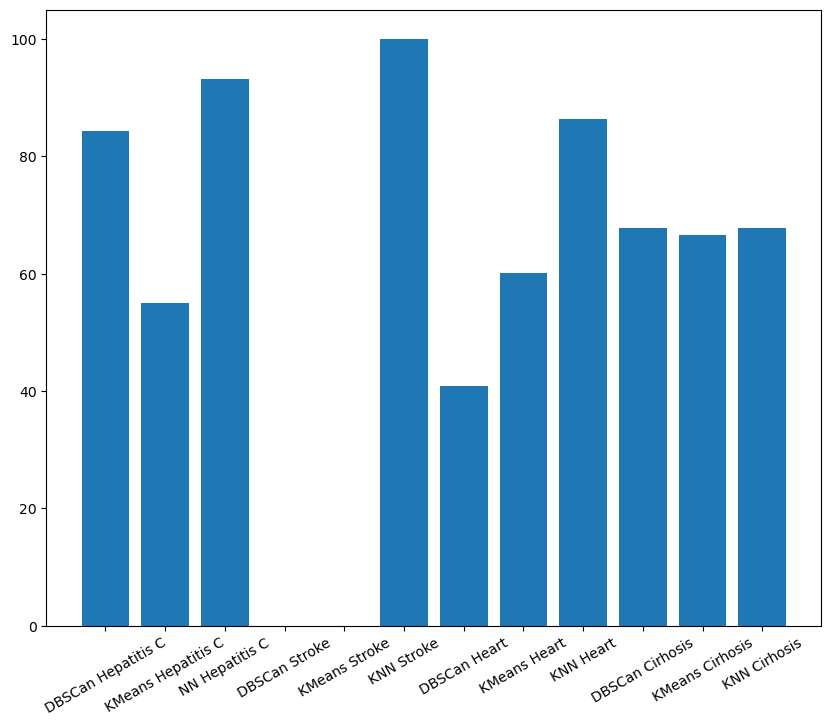

In [145]:
plt.figure(figsize=(10,8))
plt.bar(result['Model'],result['Accuracy'])
plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'DBSCan Hepatitis C'),
  Text(1, 0, 'KMeans Hepatitis C'),
  Text(2, 0, 'NN Hepatitis C'),
  Text(3, 0, 'DBSCan Stroke'),
  Text(4, 0, 'KMeans Stroke'),
  Text(5, 0, 'KNN Stroke'),
  Text(6, 0, 'DBSCan Heart'),
  Text(7, 0, 'KMeans Heart'),
  Text(8, 0, 'KNN Heart'),
  Text(9, 0, 'DBSCan Cirhosis'),
  Text(10, 0, 'KMeans Cirhosis'),
  Text(11, 0, 'KNN Cirhosis')])

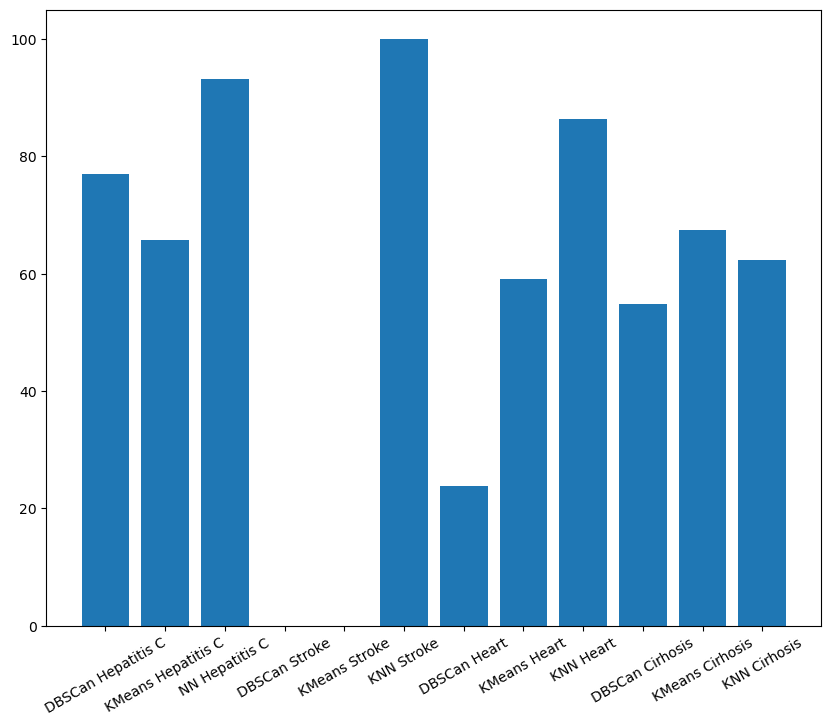

In [146]:
plt.figure(figsize=(10,8))
plt.bar(result['Model'],result['F1-Score'])
plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'DBSCan Hepatitis C'),
  Text(1, 0, 'KMeans Hepatitis C'),
  Text(2, 0, 'NN Hepatitis C'),
  Text(3, 0, 'DBSCan Stroke'),
  Text(4, 0, 'KMeans Stroke'),
  Text(5, 0, 'KNN Stroke'),
  Text(6, 0, 'DBSCan Heart'),
  Text(7, 0, 'KMeans Heart'),
  Text(8, 0, 'KNN Heart'),
  Text(9, 0, 'DBSCan Cirhosis'),
  Text(10, 0, 'KMeans Cirhosis'),
  Text(11, 0, 'KNN Cirhosis')])

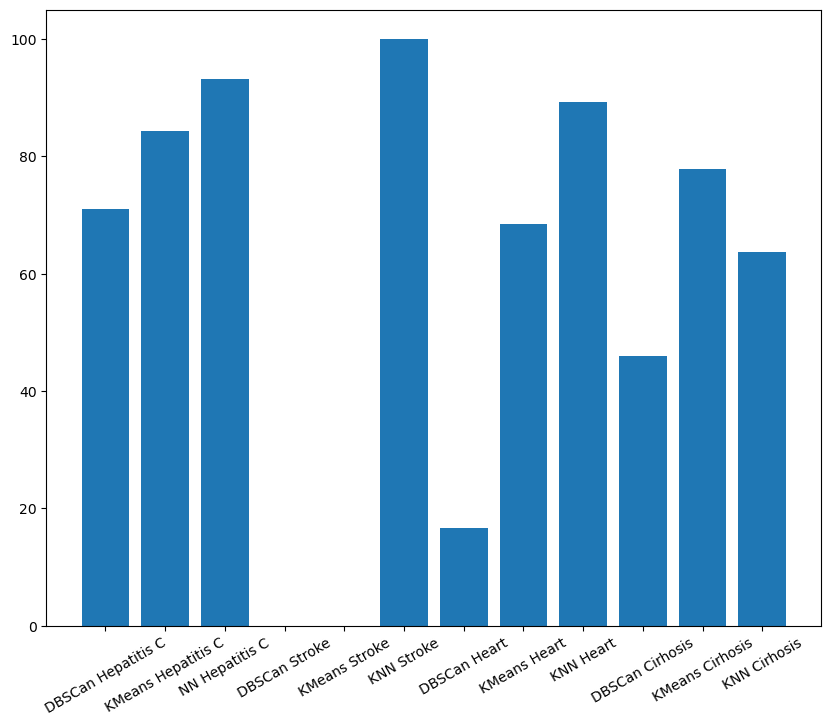

In [147]:
plt.figure(figsize=(10,8))
plt.bar(result['Model'],result['Precision'])
plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'DBSCan Hepatitis C'),
  Text(1, 0, 'KMeans Hepatitis C'),
  Text(2, 0, 'NN Hepatitis C'),
  Text(3, 0, 'DBSCan Stroke'),
  Text(4, 0, 'KMeans Stroke'),
  Text(5, 0, 'KNN Stroke'),
  Text(6, 0, 'DBSCan Heart'),
  Text(7, 0, 'KMeans Heart'),
  Text(8, 0, 'KNN Heart'),
  Text(9, 0, 'DBSCan Cirhosis'),
  Text(10, 0, 'KMeans Cirhosis'),
  Text(11, 0, 'KNN Cirhosis')])

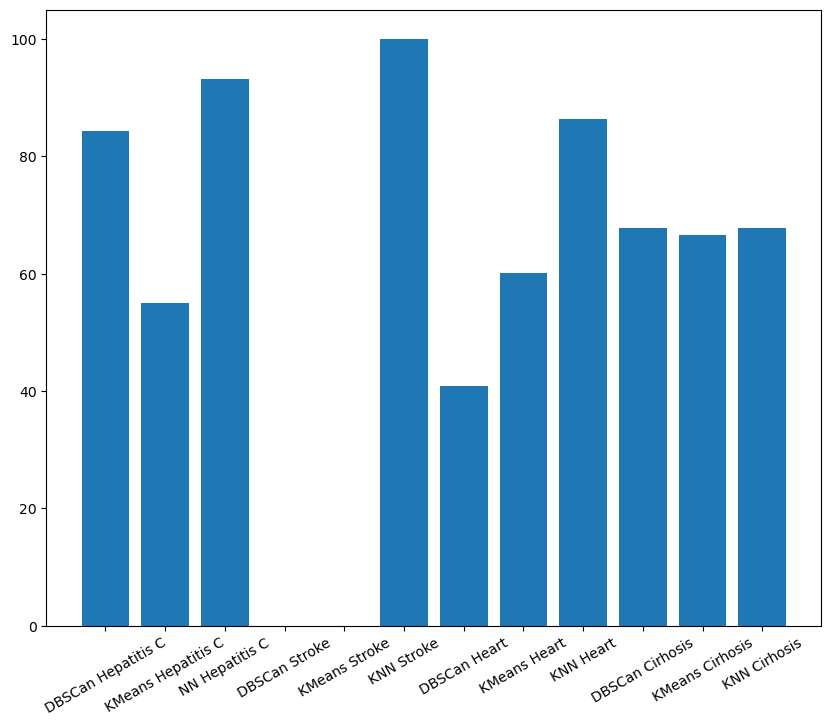

In [148]:
plt.figure(figsize=(10,8))
plt.bar(result['Model'],result['Recall'])
plt.xticks(rotation=30)

In [149]:
result_heart.columns = ['Model', 'Accuracy','F1-Score','Precision','Recall']
result_heart

,Model,Accuracy,F1-Score,Precision,Recall
0,DBSCan,40.909091,23.753666,16.735537,40.909091
0,KMeans,60.101010,59.027601,68.409307,60.101010
0,KNN,86.363636,86.459586,89.323402,86.363636


([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

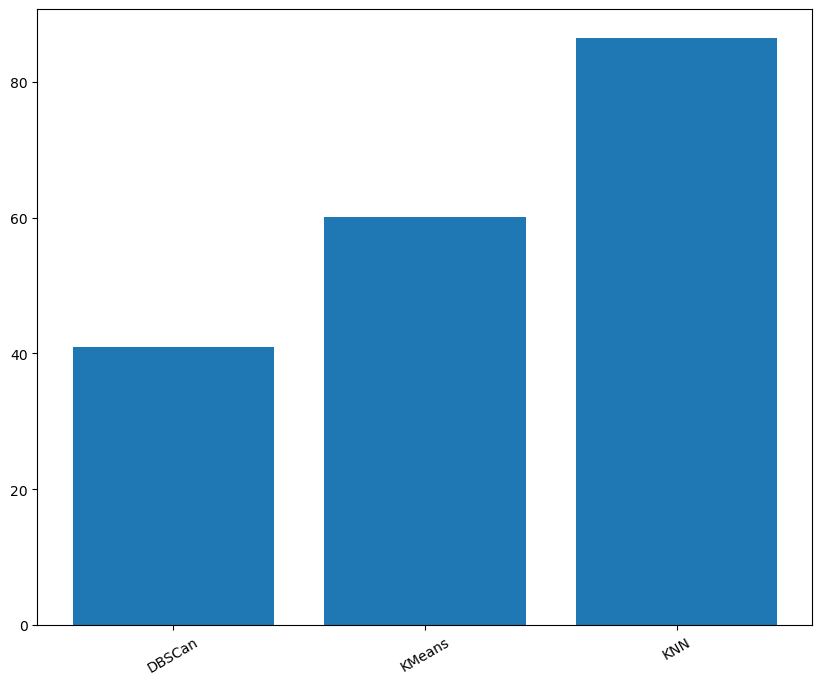

In [150]:
plt.figure(figsize=(10,8))
plt.bar(result_heart['Model'],result_heart['Accuracy'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

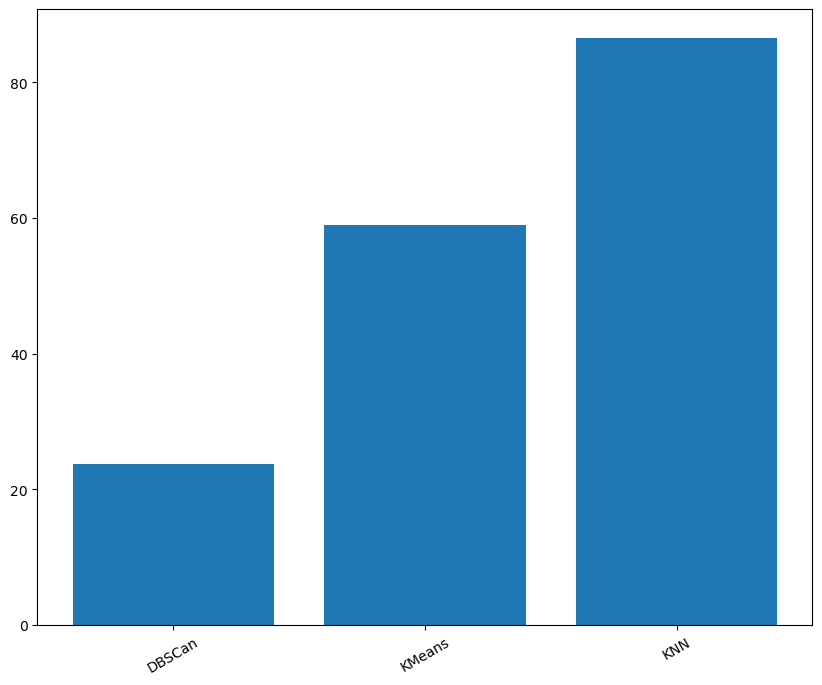

In [151]:
plt.figure(figsize=(10,8))
plt.bar(result_heart['Model'],result_heart['F1-Score'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

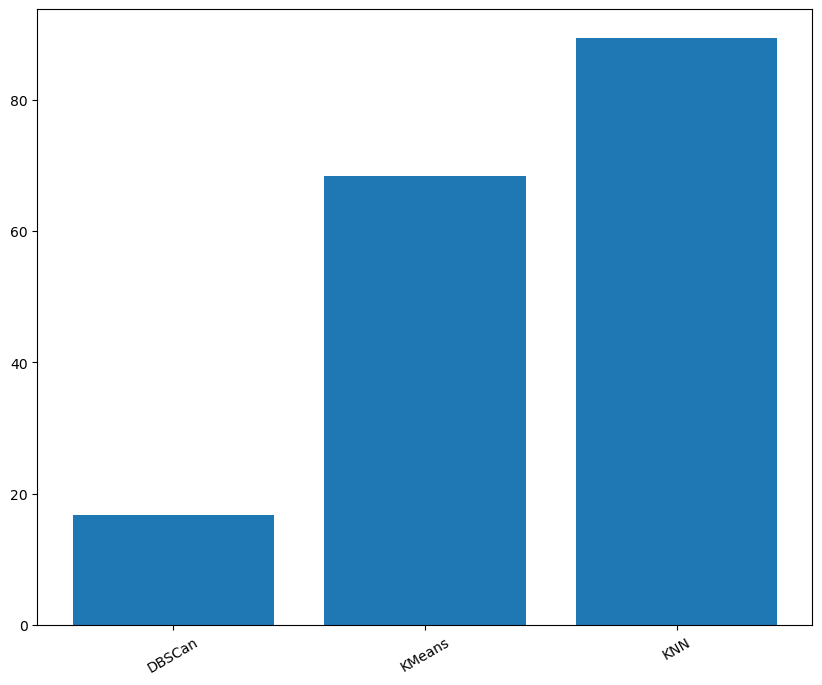

In [152]:
plt.figure(figsize=(10,8))
plt.bar(result_heart['Model'],result_heart['Precision'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

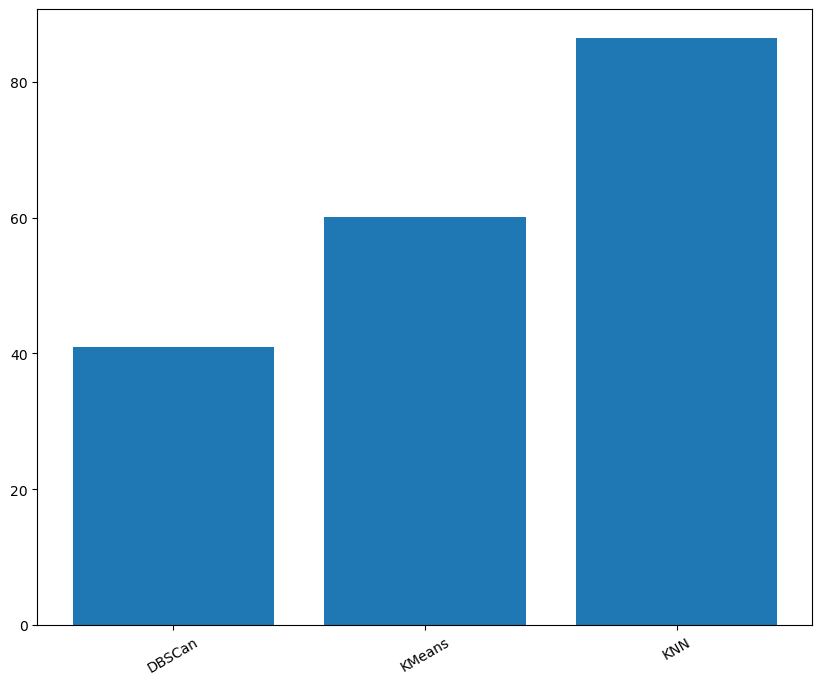

In [153]:
plt.figure(figsize=(10,8))
plt.bar(result_heart['Model'],result_heart['Recall'])
plt.xticks(rotation=30)

In [154]:
result_hepC.columns = ['Model', 'Accuracy','F1-Score','Precision','Recall']
result_hepC

,Model,Accuracy,F1-Score,Precision,Recall
0,DBSCan,84.269663,77.075911,71.013761,84.269663
0,KMeans,55.056180,65.824949,84.297068,55.056180
0,NN,93.258427,93.199726,93.273211,93.258427


([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'NN')])

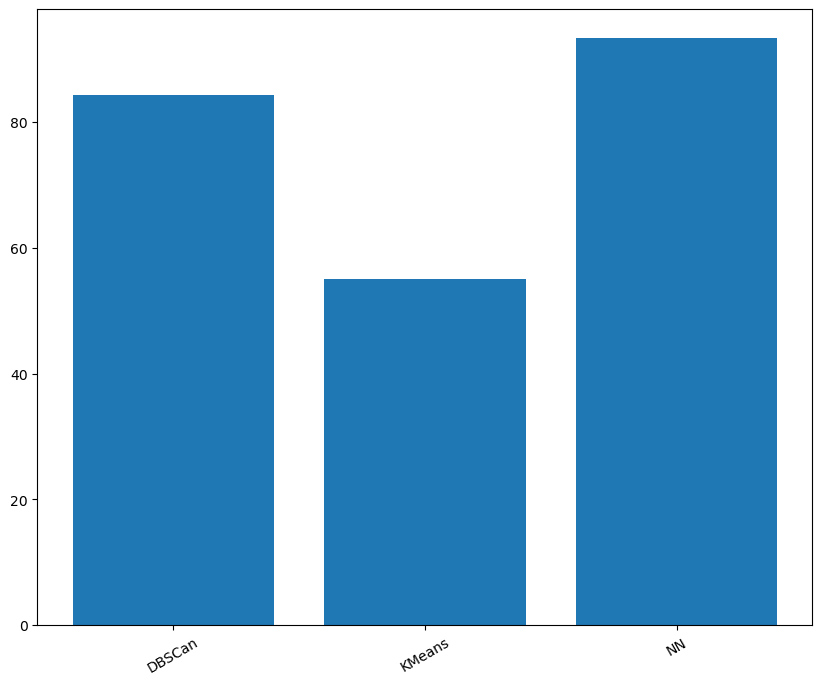

In [155]:
plt.figure(figsize=(10,8))
plt.bar(result_hepC['Model'],result_hepC['Accuracy'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'NN')])

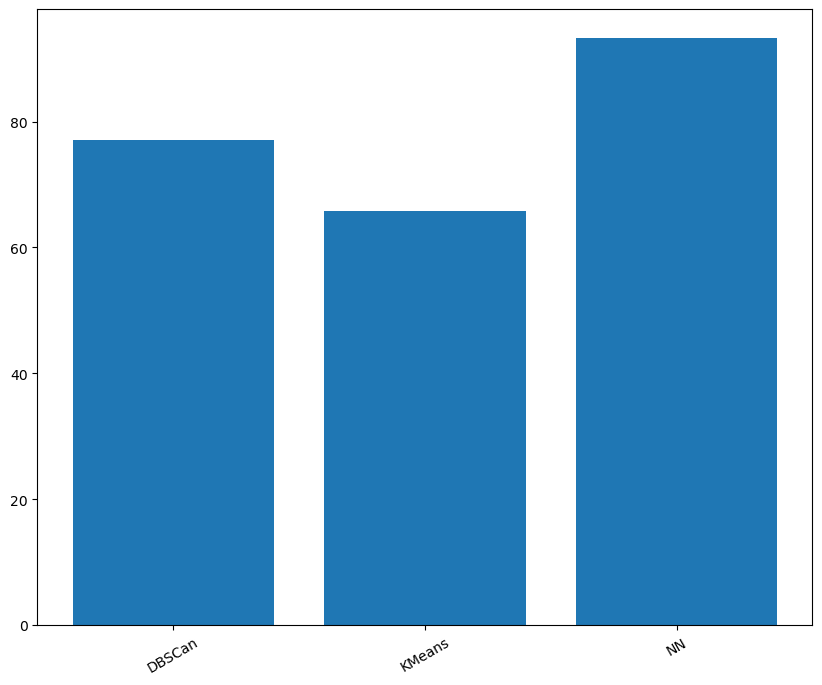

In [156]:
plt.figure(figsize=(10,8))
plt.bar(result_hepC['Model'],result_hepC['F1-Score'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'NN')])

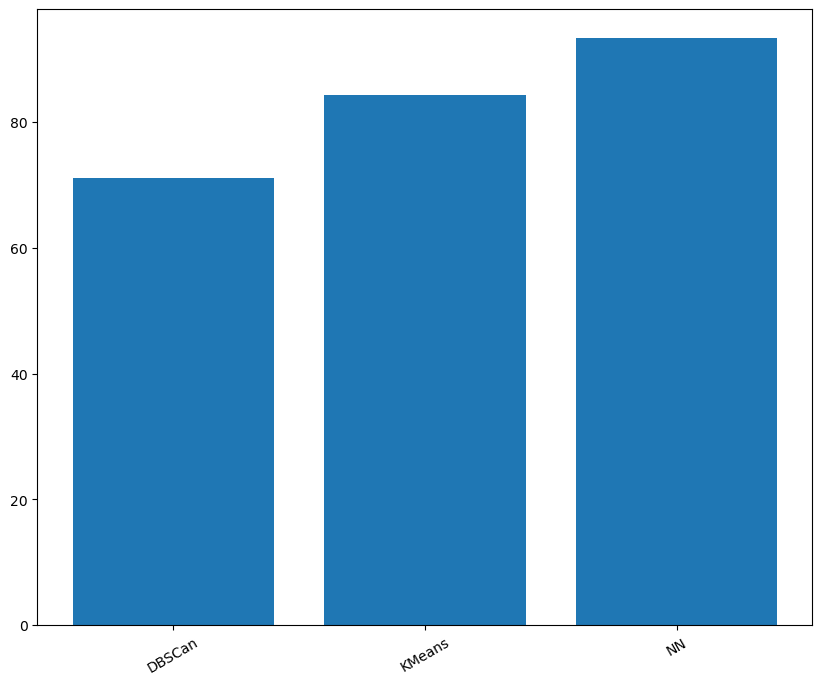

In [157]:
plt.figure(figsize=(10,8))
plt.bar(result_hepC['Model'],result_hepC['Precision'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'NN')])

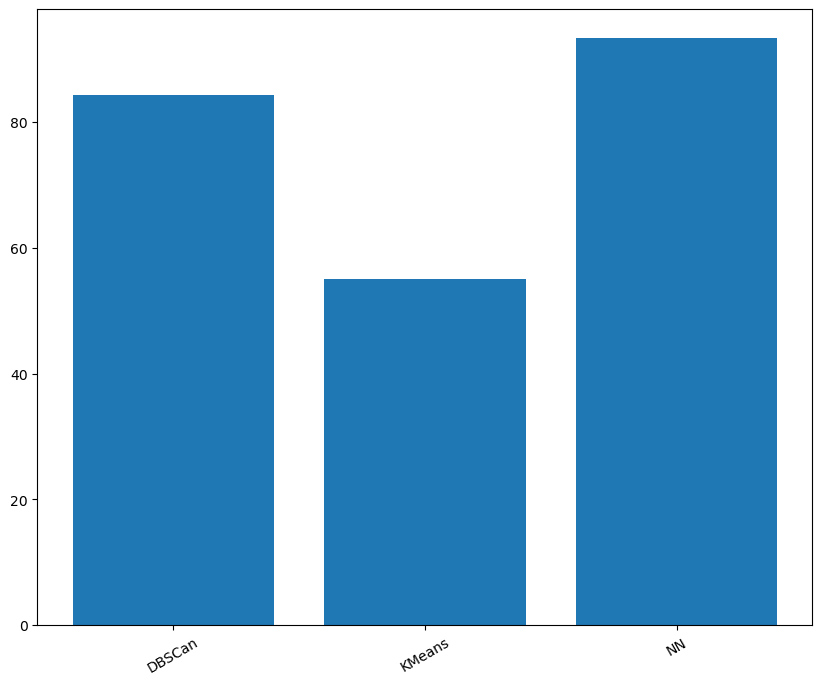

In [158]:
plt.figure(figsize=(10,8))
plt.bar(result_hepC['Model'],result_hepC['Recall'])
plt.xticks(rotation=30)

In [159]:
result_cirhosis.columns = ['Model', 'Accuracy','F1-Score','Precision','Recall']
result_cirhosis

,Model,Accuracy,F1-Score,Precision,Recall
0,DBSCan,67.816092,54.810266,45.990223,67.816092
0,KMeans,66.666667,67.483900,77.941176,66.666667
0,KNN,67.816092,62.323405,63.651291,67.816092


([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

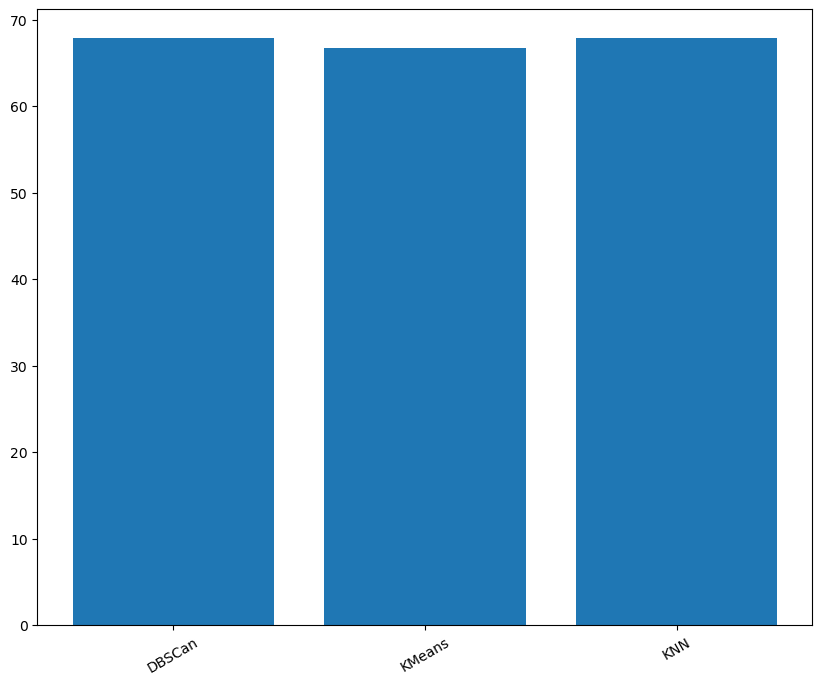

In [160]:
plt.figure(figsize=(10,8))
plt.bar(result_cirhosis['Model'],result_cirhosis['Accuracy'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

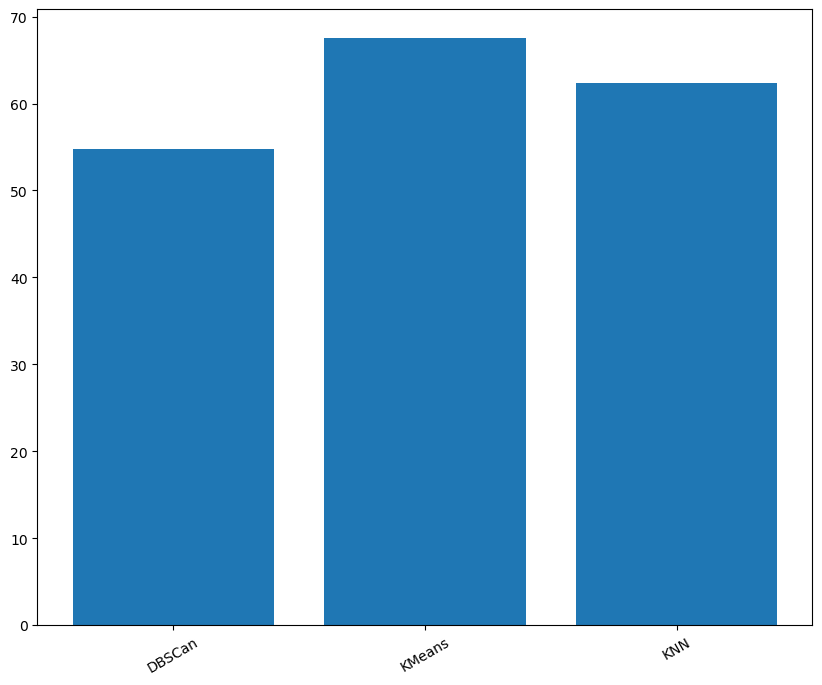

In [161]:
plt.figure(figsize=(10,8))
plt.bar(result_cirhosis['Model'],result_cirhosis['F1-Score'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

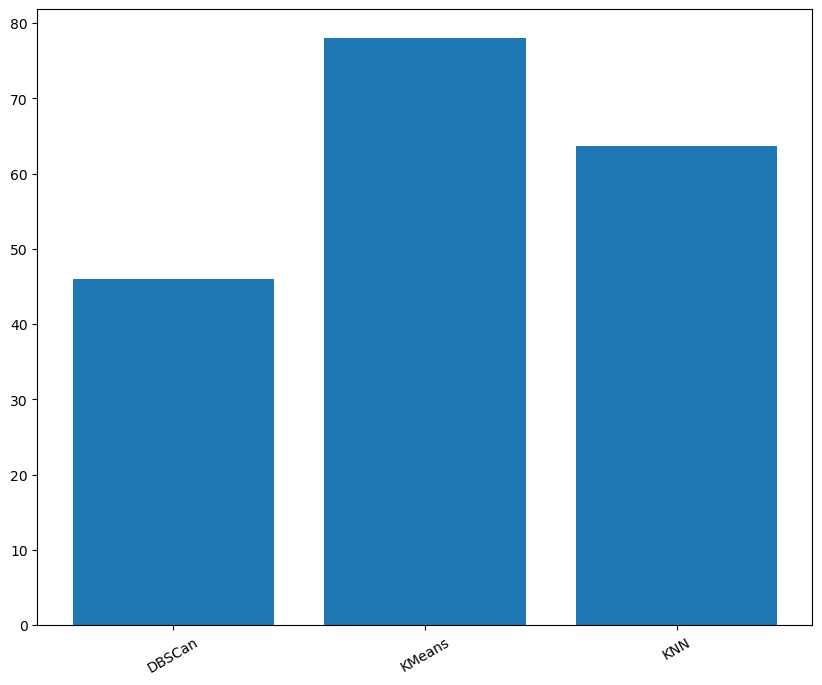

In [162]:
plt.figure(figsize=(10,8))
plt.bar(result_cirhosis['Model'],result_cirhosis['Precision'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

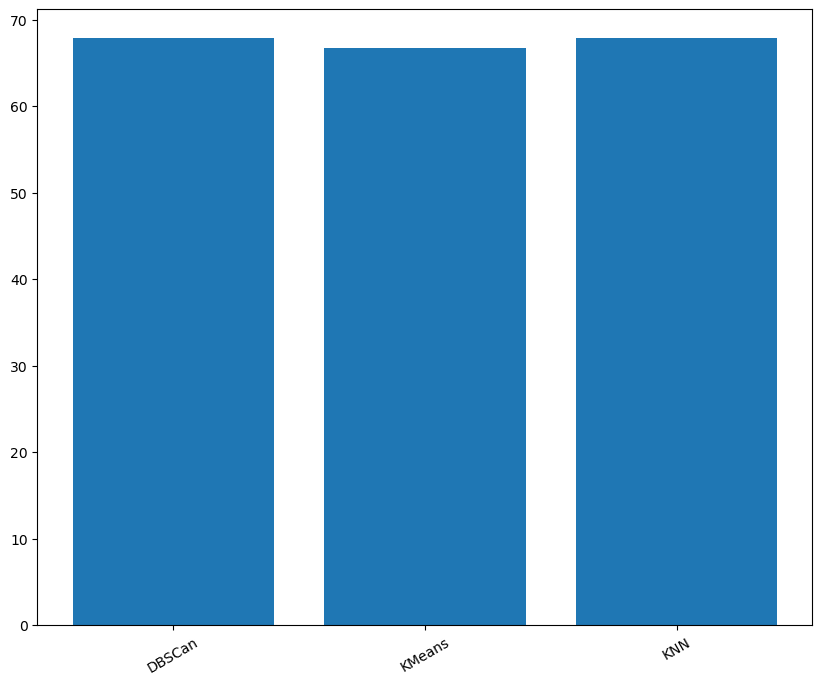

In [163]:
plt.figure(figsize=(10,8))
plt.bar(result_cirhosis['Model'],result_cirhosis['Recall'])
plt.xticks(rotation=30)

In [164]:
result_stroke.columns = ['Model', 'Accuracy','F1-Score','Precision','Recall']
result_stroke

,Model,Accuracy,F1-Score,Precision,Recall
0,DBSCan,0.0,0.0,0.0,0.0
0,KMeans,0.0,0.0,0.0,0.0
0,KNN,100.0,100.0,100.0,100.0


([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

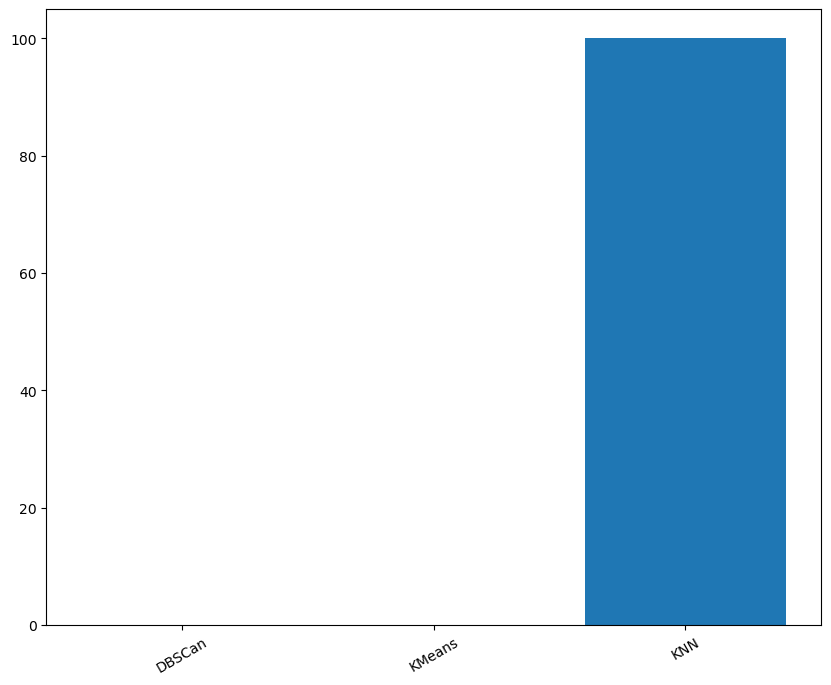

In [165]:
plt.figure(figsize=(10,8))
plt.bar(result_stroke['Model'],result_stroke['Accuracy'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

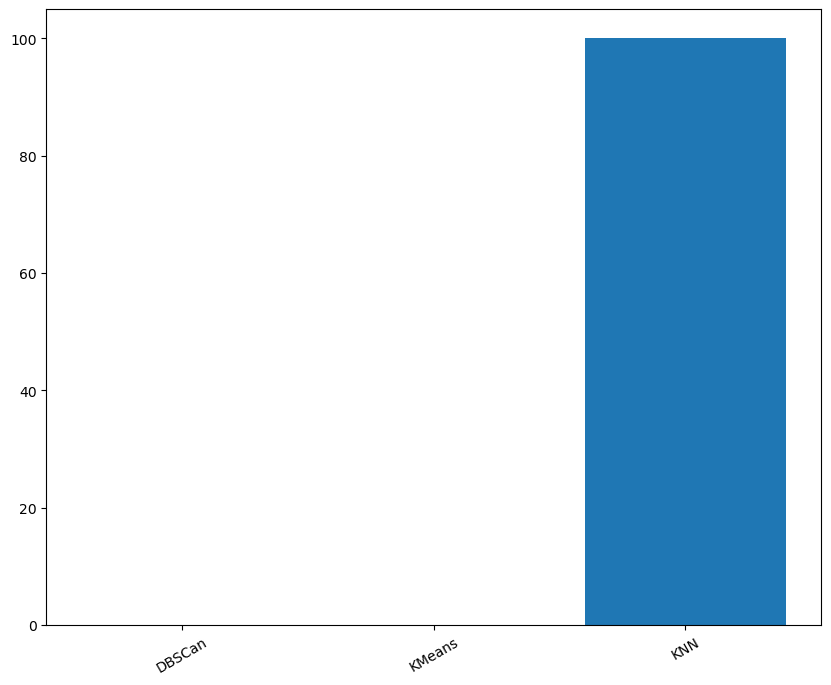

In [166]:
plt.figure(figsize=(10,8))
plt.bar(result_stroke['Model'],result_stroke['F1-Score'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

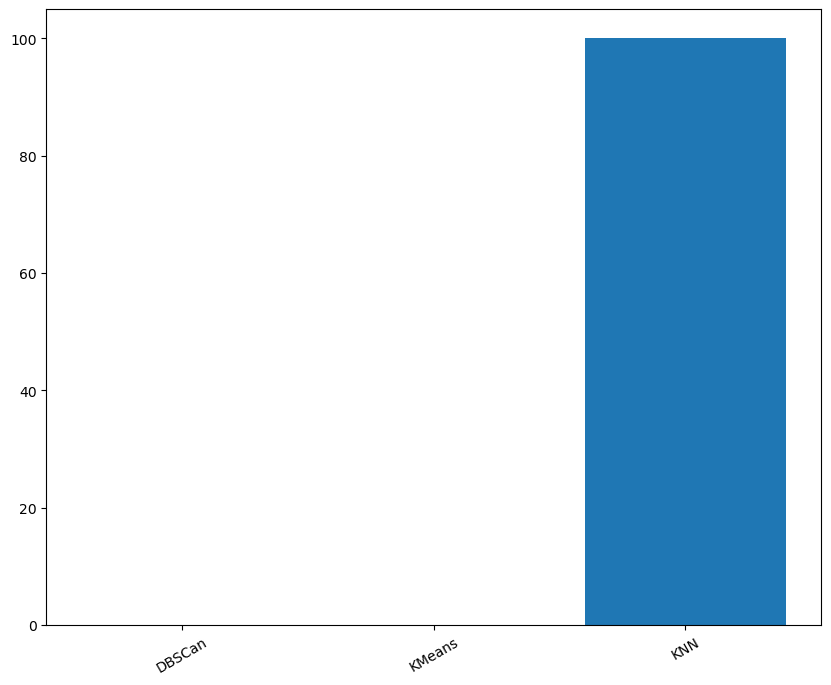

In [167]:
plt.figure(figsize=(10,8))
plt.bar(result_stroke['Model'],result_stroke['Precision'])
plt.xticks(rotation=30)

([0, 1, 2], [Text(0, 0, 'DBSCan'), Text(1, 0, 'KMeans'), Text(2, 0, 'KNN')])

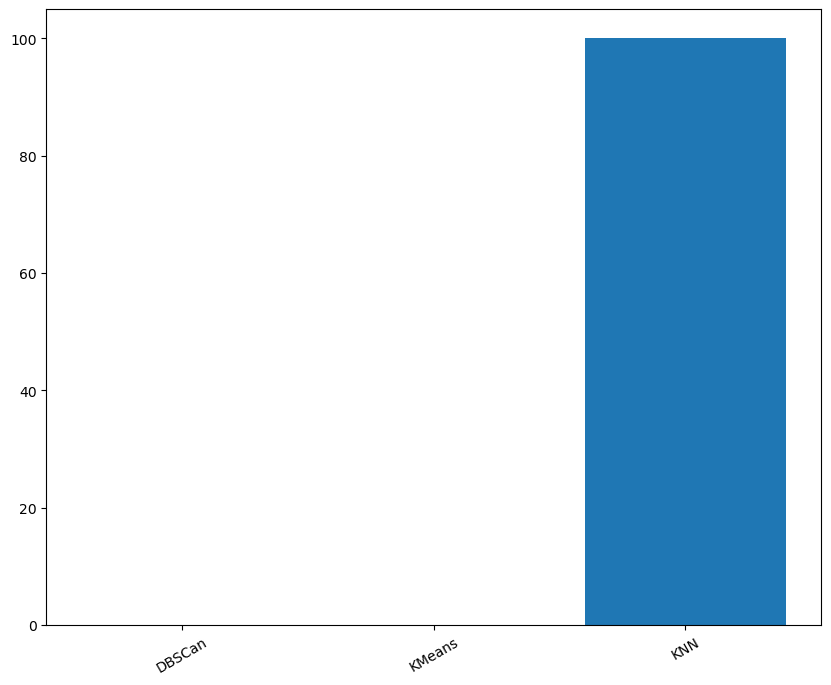

In [168]:
plt.figure(figsize=(10,8))
plt.bar(result_stroke['Model'],result_stroke['Recall'])
plt.xticks(rotation=30)